In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Absents = pd.read_csv("train_data.csv")
X_test  = pd.read_csv("test_data.csv")
Y_test  = pd.read_csv("sample_submission.csv")

In [3]:
Absents

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,1,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1
1,2,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,1
3,4,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,1
4,5,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,28,9,3,1,246,25,16,41,"261,756",...,0,1,0,1,0,0,67,170,23,0
496,497,28,9,3,1,246,25,16,41,"261,756",...,0,1,0,1,0,0,67,170,23,0
497,498,28,9,3,1,118,10,10,37,"261,756",...,0,1,0,0,0,0,83,172,28,1
498,499,23,9,3,1,155,12,14,34,"261,756",...,0,1,2,1,0,0,95,196,25,1


In [4]:
Absents.drop(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,1,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1
1,2,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
3,4,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,1
4,5,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1
5,6,23,7,6,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,28,9,3,1,246,25,16,41,"261,756",...,0,1,0,1,0,0,67,170,23,0
496,497,28,9,3,1,246,25,16,41,"261,756",...,0,1,0,1,0,0,67,170,23,0
497,498,28,9,3,1,118,10,10,37,"261,756",...,0,1,0,0,0,0,83,172,28,1
498,499,23,9,3,1,155,12,14,34,"261,756",...,0,1,2,1,0,0,95,196,25,1


## Normalizar os dados

In [5]:
abs = [x for x in Absents['Absent'] if x == 1]
workload = [int(x.replace(",","")) for x in Absents['Work load Average/day ']]
Absents['Work load Average/day '] = workload

In [6]:
from sklearn import preprocessing

def normalize_dataset(Absents):
    x = Absents.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)

    i = 0
    for x in Absents:
        Absents[x] = df[i]
    
        i+=1


        
def standardize_dataset():
    global Absents
    x = Absents.values
    min_max_scaler = preprocessing.StandardScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)

    i = 0
    for x in Absents:
        Absents[x] = df[i]
        i+=1
    
normalize_dataset(Absents)
Absents

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,0.000000,0.928571,0.545455,0.25,0.0,0.633333,0.659574,0.384615,0.193548,0.194471,...,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947,1.0
1,0.002004,0.000000,0.545455,0.25,0.0,0.000000,0.170213,0.576923,0.741935,0.194471,...,1.0,0.0,0.25,1.0,0.0,0.0,0.807692,0.454545,0.631579,0.0
2,0.004008,0.821429,0.545455,0.50,0.0,0.225926,0.978723,0.576923,0.354839,0.194471,...,0.0,0.0,0.00,1.0,0.0,0.0,0.634615,0.212121,0.631579,1.0
3,0.006012,0.250000,0.545455,0.75,0.0,0.596296,0.000000,0.423077,0.387097,0.194471,...,0.0,0.0,0.50,1.0,1.0,0.0,0.230769,0.151515,0.263158,1.0
4,0.008016,0.821429,0.545455,0.75,0.0,0.633333,0.659574,0.384615,0.193548,0.194471,...,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.991984,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.500000,0.451613,0.322830,...,0.0,0.0,0.00,1.0,0.0,0.0,0.211538,0.212121,0.210526,0.0
496,0.993988,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.500000,0.451613,0.322830,...,0.0,0.0,0.00,1.0,0.0,0.0,0.211538,0.212121,0.210526,0.0
497,0.995992,1.000000,0.727273,0.25,0.0,0.000000,0.106383,0.269231,0.322581,0.322830,...,0.0,0.0,0.00,0.0,0.0,0.0,0.519231,0.272727,0.473684,1.0
498,0.997996,0.821429,0.727273,0.25,0.0,0.137037,0.148936,0.423077,0.225806,0.322830,...,0.0,0.0,0.50,1.0,0.0,0.0,0.750000,1.000000,0.315789,1.0


## Removemos os outliers

In [7]:
''''
x = Absents.quantile(0.975)
y = Absents.quantile(0.025)

##x['ID']



for i in Absents[1:]:
    Absents = Absents.drop(Absents[Absents[i] > x[i]].index)
    Absents = Absents.drop(Absents[Absents[i] < y[i]].index)
'''


"'\nx = Absents.quantile(0.975)\ny = Absents.quantile(0.025)\n\n##x['ID']\n\n\n\nfor i in Absents[1:]:\n    Absents = Absents.drop(Absents[Absents[i] > x[i]].index)\n    Absents = Absents.drop(Absents[Absents[i] < y[i]].index)\n"

In [8]:
print(len(Absents[Absents['Absent'] == 1]))
print(len(Absents[Absents['Absent'] == 0]))

395
105


In [9]:

print(len(Absents.values))

500


## Balancear o dataset

In [10]:
abs_shuffled = Absents.sample(frac=1,random_state=4)


wtw = abs_shuffled.loc[abs_shuffled['Absent'] == 1].sample(n=83,random_state=4)

dsu = abs_shuffled.loc[abs_shuffled['Absent'] == 0]

balanced_absents = pd.concat([wtw,dsu])
Absents = balanced_absents

In [11]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = Absents.drop('Absent',axis = 1)
Y = Absents['Absent']
"""
X_new = SelectKBest(chi2,k=16).fit(X,Y)
X= X_new.transform(X)
"""

'\nX_new = SelectKBest(chi2,k=16).fit(X,Y)\nX= X_new.transform(X)\n'

In [12]:
new_Absents = pd.DataFrame(X)
Y

418    1.0
366    1.0
11     1.0
474    1.0
451    1.0
      ... 
313    0.0
311    0.0
94     0.0
58     0.0
306    0.0
Name: Absent, Length: 188, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
normalize_dataset(X_test)
##X_test = X_new.transform(X_test)

##X = Absents.drop('Absent',axis = 1)
##Y = Absents['Absent']

lm = LinearRegression()
lm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
predictions = lm.predict(X_test)
print(len(Y_test['Absent']))
print(len(predictions))
predictions

240
240


array([ 0.1896072 ,  0.36651709,  0.32107517,  0.36537454,  0.13323106,
        0.59992564,  0.57613717,  1.00082163,  0.12949938,  0.3049223 ,
        0.79038574,  0.29071942,  0.16743249,  0.62885195,  0.42002344,
        0.35624627,  0.507645  ,  0.50813584,  0.35771879,  0.44992046,
        0.25998478,  0.72577152,  0.3947804 ,  0.7967712 ,  0.58715708,
        0.81233775,  0.66192069,  0.30711775,  0.19422328,  0.57800819,
       -0.18987997,  0.5614232 ,  0.4155113 ,  0.11975806,  0.86453465,
        0.32261196,  0.48156041,  0.63248153,  0.38222778,  0.43787586,
        0.52124066,  0.33153942,  0.43474577,  0.60284552,  0.26869001,
        0.19514014,  0.50620114,  0.39804795, -0.11985176,  0.11920001,
        0.57923586, -0.16043362,  0.44425675,  0.53645842,  0.3951334 ,
        0.5203682 ,  0.2746108 ,  0.35325001,  0.37676955,  0.38340143,
        0.35472252,  0.65428563,  0.5396767 ,  0.27545699,  0.06226049,
        0.3364508 ,  0.34308268,  0.37274326,  0.32947948,  0.17

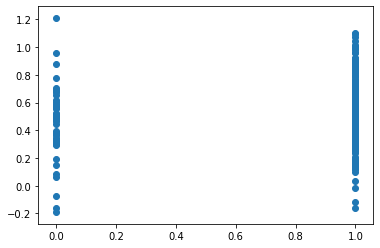

In [16]:
plt.scatter(Y_test['Absent'],predictions)

In [17]:
print(len(Y))
print(len(X))


188
188


In [18]:
from sklearn.metrics import accuracy_score
predictions = [int( x  > 0.5) for x in predictions]
predictions
        

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [19]:
accuracy_score(Y_test['Absent'],predictions)

0.5708333333333333